In [2]:
import pandas as pd

In [3]:
patch1="Call-Center-Dataset.csv"
patch2="movies.csv"
patch3="employee_data.csv"
patch4="SampleSuperstore.csv"
patch5="StudentPerformanceFactors.csv"
data1=pd.read_csv(patch1,delimiter=";")
data2=pd.read_csv(patch2,delimiter=",")
data3=pd.read_csv(patch3,delimiter=",")
data4=pd.read_csv(patch4,delimiter=",")
data5=pd.read_csv(patch5,delimiter=",")


In [165]:
df1=pd.DataFrame(data1)
df2=pd.DataFrame(data2)
df3=pd.DataFrame(data3)
df4=pd.DataFrame(data4)
df5=pd.DataFrame(data5)

,ID,Gender,Experience (Years),Position,Salary
0,1,F,4,DevOps Engineer,109976
1,2,M,6,DevOps Engineer,120088
2,3,M,17,Web Developer,181301
3,4,M,7,Systems Administrator,77530
4,5,F,13,Systems Administrator,152397


**For the beginner Project We use the df3** 
1.  Pour la répartition et les disparités : ✅


- Un diagramme en barres comparant le salaire moyen par poste 
- Un diagramme en anneau  homme/femme
- Un graphique pour visualiser la distribution des salaires selon l'expérience


2.  Pour l'analyse de l'expérience :


- Un scatter plot (nuage de points) mettant en relation l'expérience et le salaire
- Une heat map montrant la correlation entre expérience, salaire et genre
- Un histogramme de la distribution de l'expérience dans l'entreprise


3. Pour la diversité des postes :


- Un camembert ou treemap montrant la répartition des employés par poste
- Un diagramme en barres empilées montrant la proportion homme/femme par poste
- Un waffle chart pour visualiser le ratio homme/femme global


4. Pour l'analyse des salaires :


- Une courbe de densité des salaires pour voir leur distribution
- Un graphique en bandes pour comparer les fourchettes salariales par poste
- Un radar chart comparant les salaires moyens par poste selon le genre


5. Pour les tendances :


- Un line plot montrant l'évolution des salaires en fonction de l'expérience
- Un bubble chart avec 3 dimensions : poste, expérience et salaire
- Un treemap hiérarchique : poste → genre → niveau d'expérience

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

1. Bar Chart for Average Salary by Job Title:

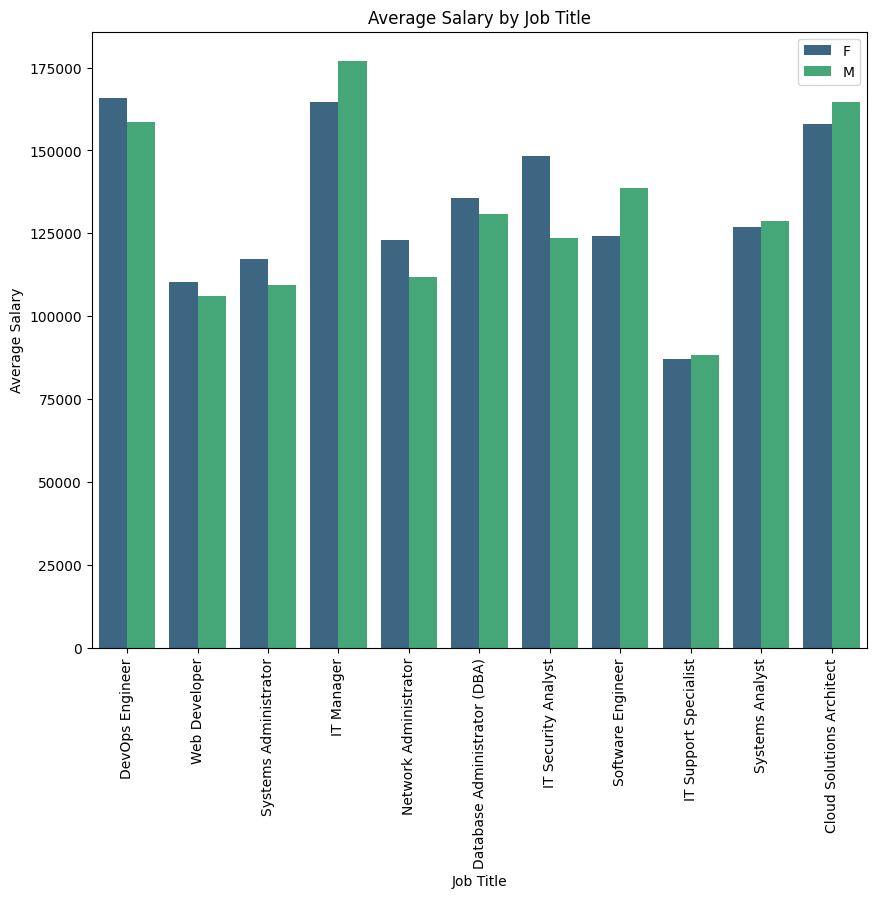

In [360]:
# Bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x='Position', y='Salary', data=df3,hue='Gender',palette='viridis',errorbar=None)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()


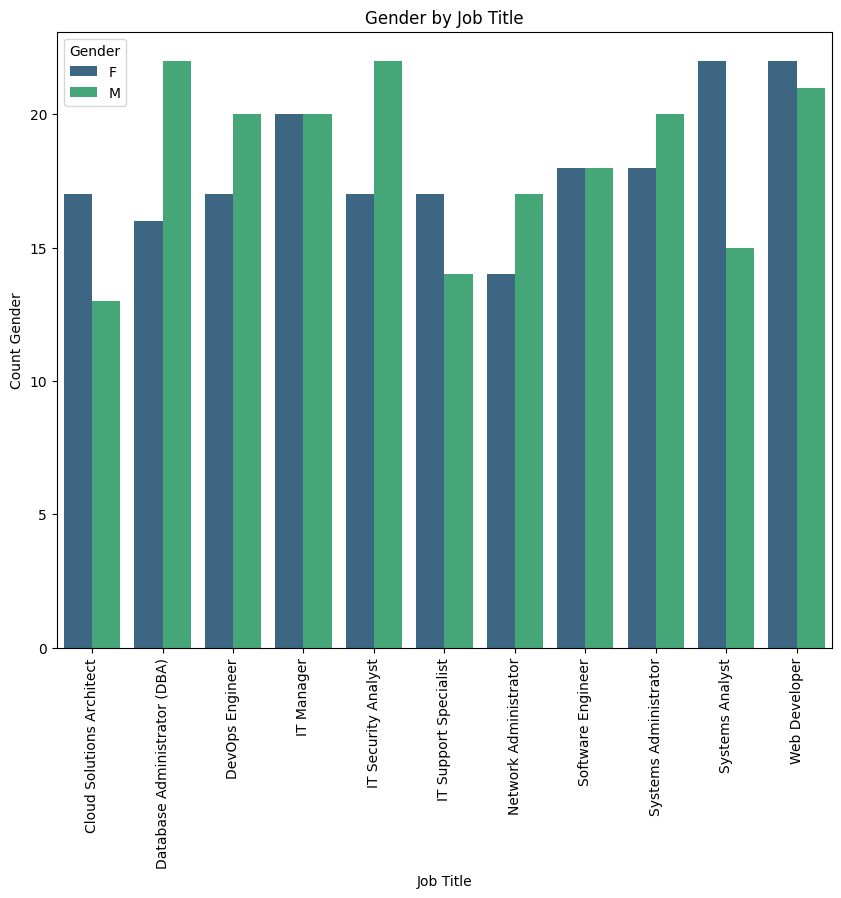

In [82]:
# Bar chart
tab=df3.groupby(['Position','Gender']).size().reset_index(name='Count')
plt.figure(figsize=(10, 8))
sns.barplot(data=tab,x='Position',y='Count',hue='Gender',palette='viridis') 
plt.title('Gender by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count Gender')
plt.xticks(rotation=90)
plt.show()

<Figure size 2000x2000 with 0 Axes>

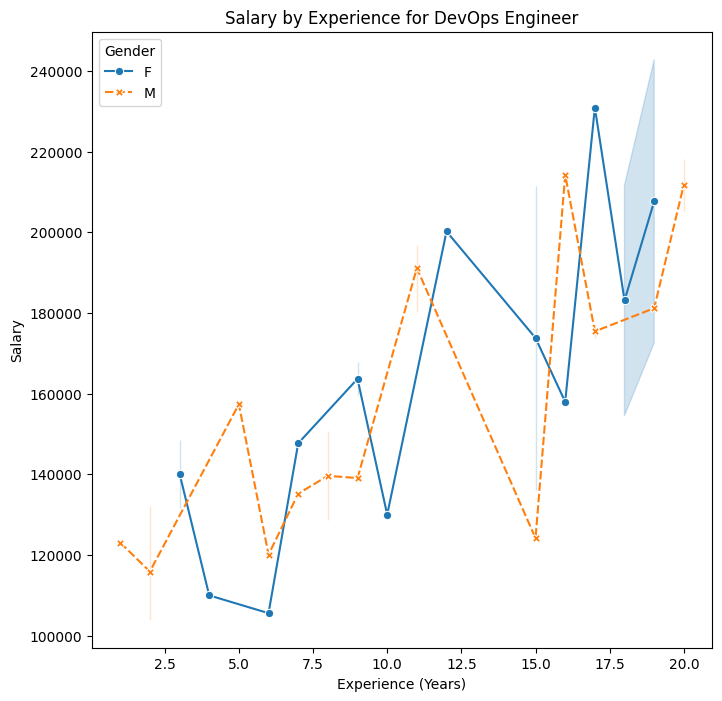

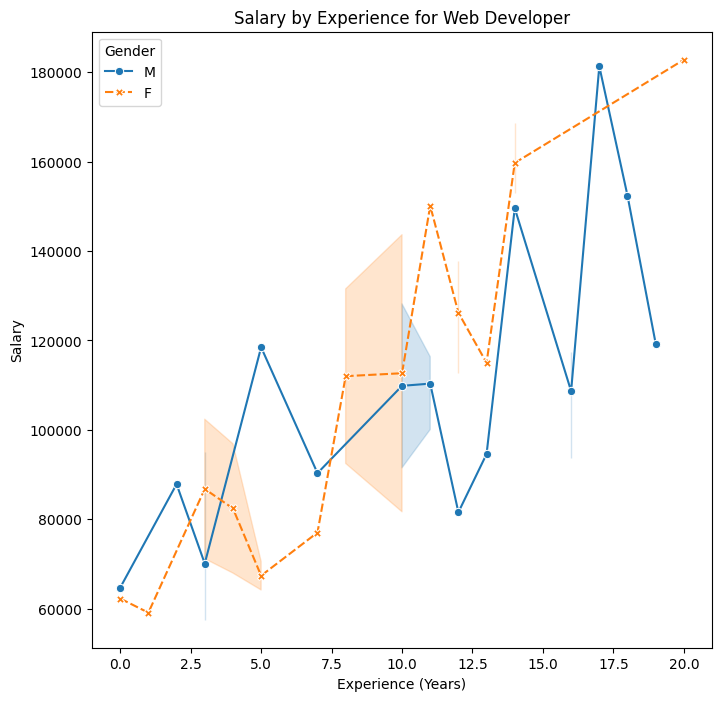

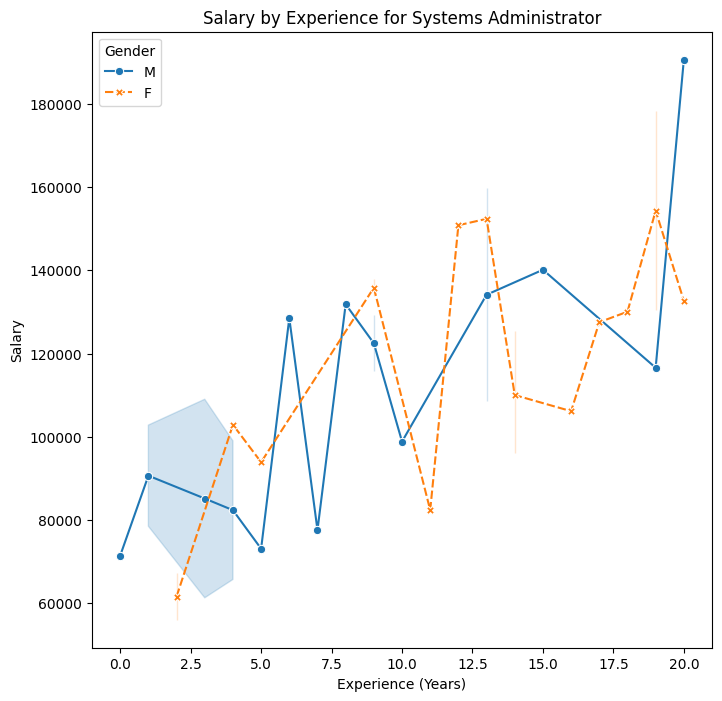

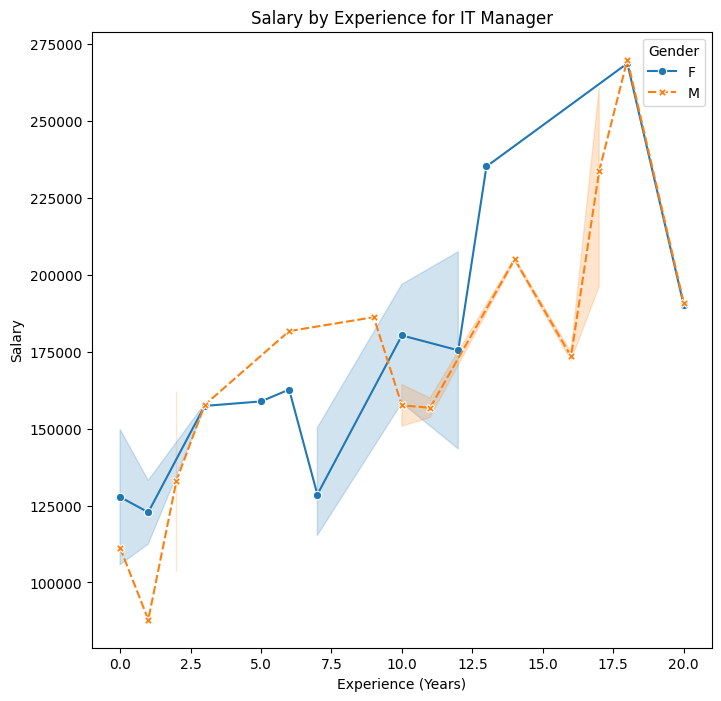

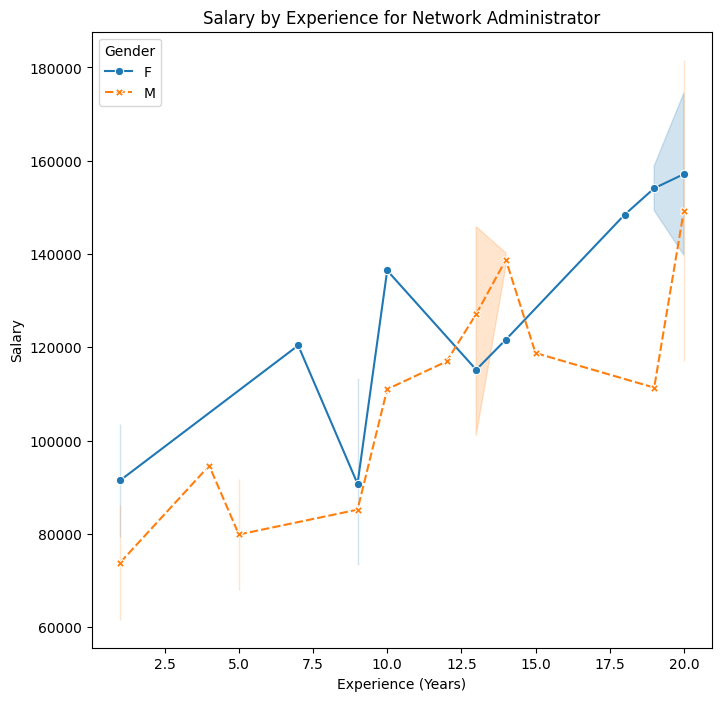

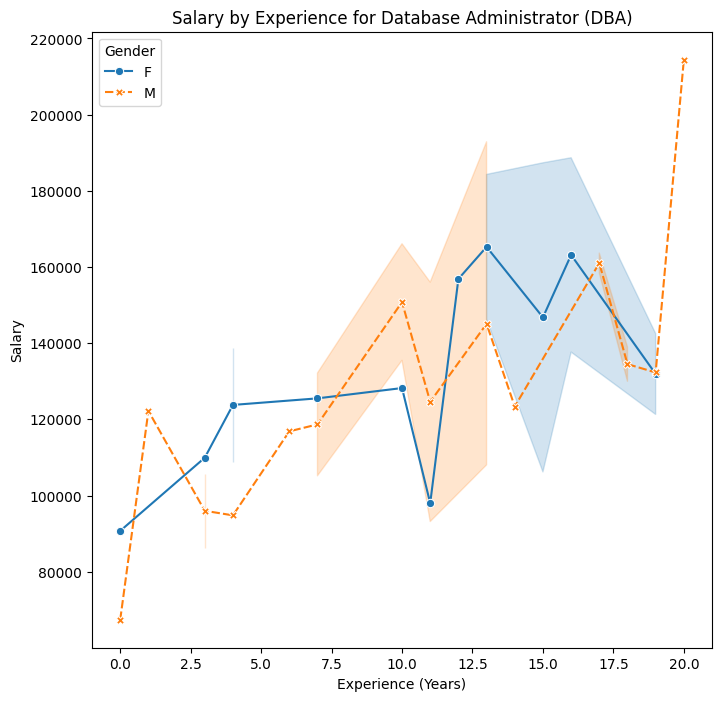

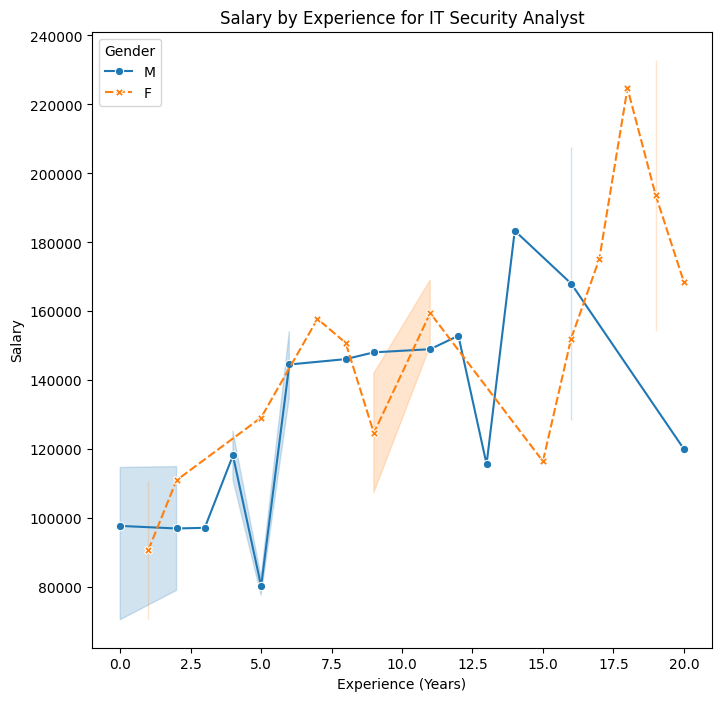

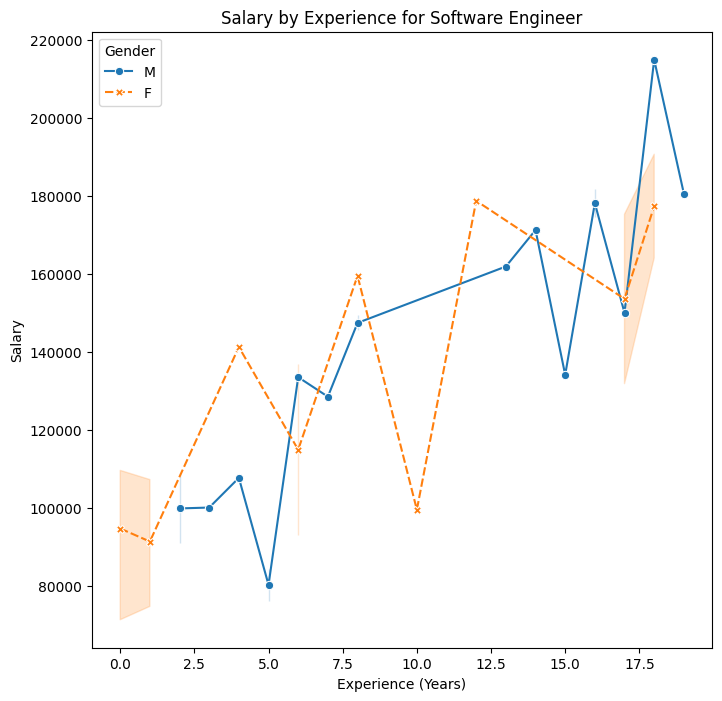

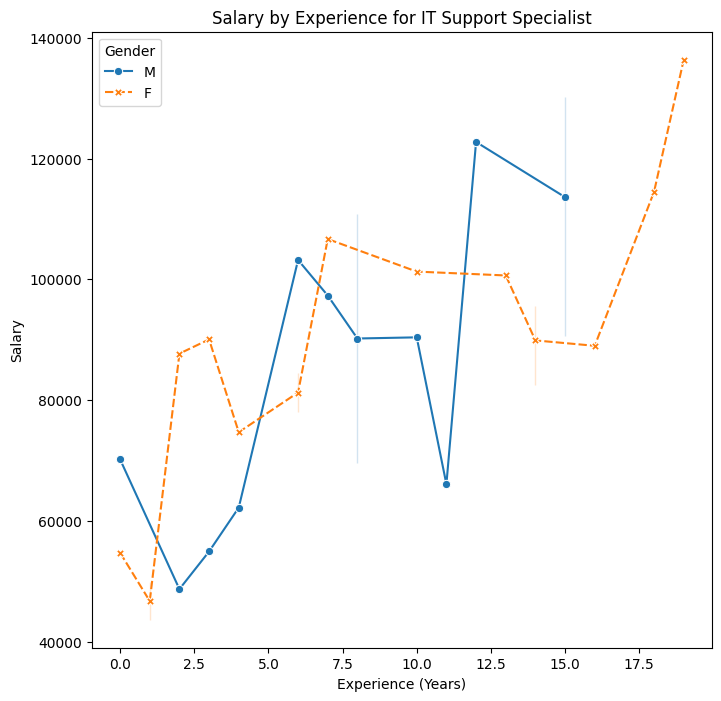

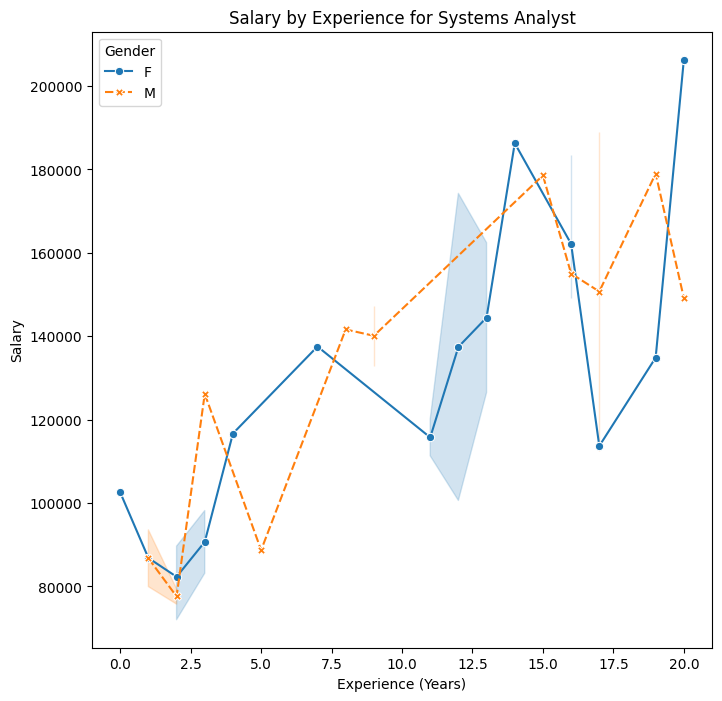

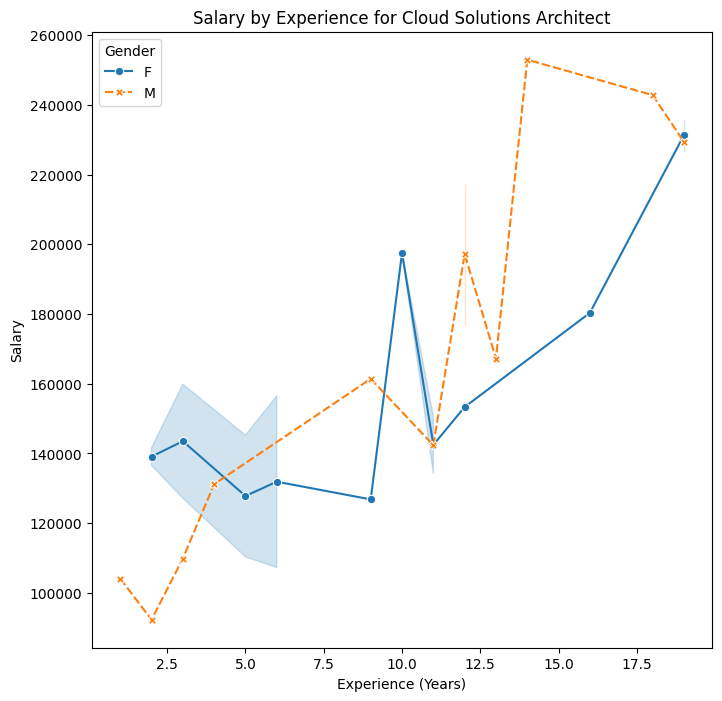

In [108]:
plt.figure(figsize=(20, 20))

def create_graph(data,position):
    data=data[data['Position']==position]
    plt.figure(figsize=(8, 8))
    sns.lineplot(y='Salary',x='Experience (Years)',hue='Gender',style='Gender',markers=True,data=data)
    plt.title('Salary by Experience for '+position)
    plt.show()
positions=df3['Position'].unique()
for position in positions:
    create_graph(df3,position)

In [106]:
grouped_df = df3.groupby(['Position', 'Gender']).size().reset_index(name='Count')
grouped_df.head()

,Position,Gender,Count
0,Cloud Solutions Architect,F,17
1,Cloud Solutions Architect,M,13
2,Database Administrator (DBA),F,16
3,Database Administrator (DBA),M,22
4,DevOps Engineer,F,17


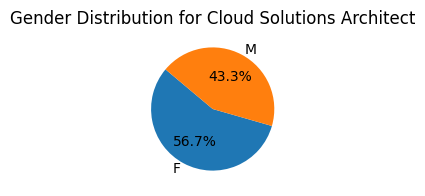

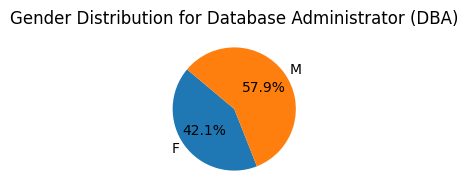

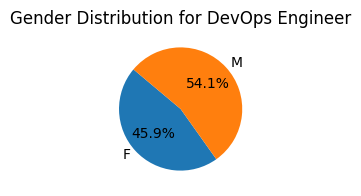

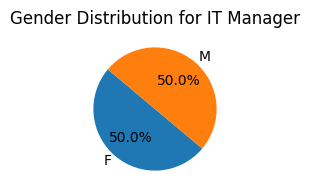

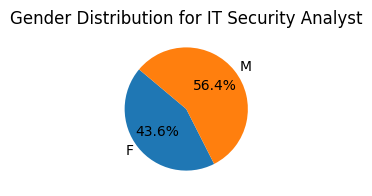

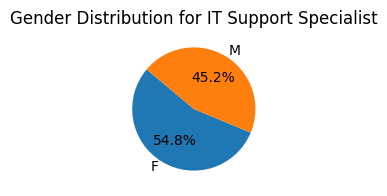

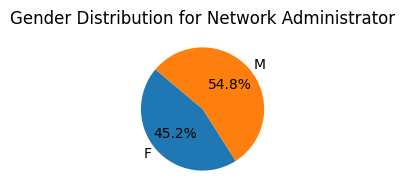

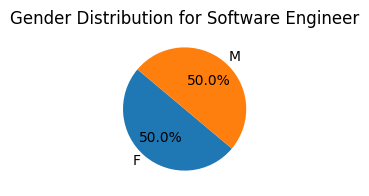

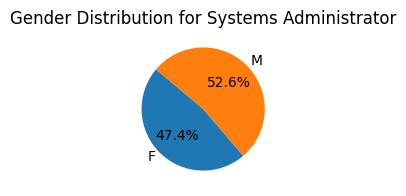

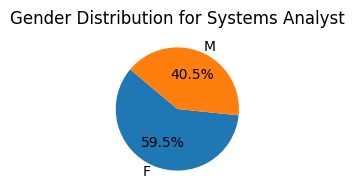

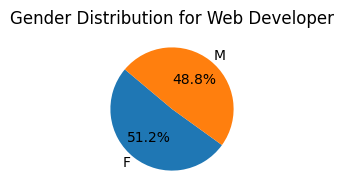

In [99]:
grouped_df = df3.groupby(['Position', 'Gender']).size().reset_index(name='Count')

# Get unique job titles
job_titles = grouped_df['Position'].unique()

# Function to create pie chart
def create_pie_chart(data, job_title):
    plt.figure(figsize=(2, 2))
    plt.pie(data['Count'], labels=data['Gender'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Gender Distribution for {job_title}')
    plt.show()

# Create pie charts for each job title
for job_title in job_titles:
    job_data = grouped_df[grouped_df['Position'] == job_title]
    create_pie_chart(job_data, job_title)

**For the intermediaire I Project We use the df1**
1. Analyse temporelle de la charge de travail :✅
    - Un histogramme empilé par département montrerait la répartition de la charge de travail entre les services


2. Performance des agents :


   - Un diagramme en boîte (boxplot) du Speed of Answer par agent révélerait la consistance et les variations dans les temps de réponse ✅
   - Un graphique en barres horizontales comparant l'AvgTalkDuration par agent aiderait à identifier ceux qui prennent plus ou moins de temps avec les clients ✅

3. Qualité de service : ✅


    - Un graphique en secteurs pour le taux de résolution (Resolved Y/N) par département donnerait une vue claire de l'efficacité
    - Un graphique en barres groupées croisant la satisfaction (Satisfaction rating) avec le temps de réponse permettrait de voir la corrélation entre ces métriques


4. Analyse par département : ✅


    - Un treemap montrant le volume d'appels par département et sous-catégorisé par agent offrirait une vue hiérarchique de la distribution du travail
    - Un diagramme en violon pour les temps de conversation par département aiderait à comprendre les patterns de durée des appels selon le type de problème

**Pour les KPIs essentiels à suivre :**

1. Efficacité opérationnelle :


    - Taux de résolution au premier appel (First Call Resolution Rate)
    - Temps moyen de réponse (Average Speed of Answer)
    - Durée moyenne de traitement (Average Handle Time)
    - Taux d'appels répondus vs manqués


2. Qualité de service :


    - Score moyen de satisfaction client
    - Pourcentage d'appels résolus
    - Distribution des notes de satisfaction
    - Corrélation entre temps de réponse et satisfaction


3. Performance des agents :


   - Productivité individuelle (nombre d'appels traités)
   - Taux de résolution par agent
   - Temps moyen de traitement par agent
   - Scores de satisfaction moyens par agent


4. Analyse départementale :


    - Volume d'appels par département
    - Taux de résolution par type de problème
    - Temps moyen de traitement par catégorie
    - Performance comparative entre départements

Ces visualisations et KPIs permettraient de repondre aux problemes suivants :

Les goulots d'étranglement dans le processus
Les moments de surcharge ou de sous-utilisation des ressources
Les corrélations entre rapidité de service et satisfaction client
Les besoins en formation ou en ressources supplémentaires
Les meilleures pratiques à partir des performances des agents les plus efficaces

In [166]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y %H:%M')

# Create new columns for date and time
df1['Date_Only'] = df1['Date'].dt.strftime('%d/%m/%Y')
df1['Time_Only'] = df1['Date'].dt.strftime('%H:%M')

# Drop the original 'Date' column if needed
df1.drop(columns=['Date'],inplace=True)

# Function to categorize the time of day
def categorize_time_of_day(hour):
    if 9 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour < 18:
        return 'Evening'

# Extract the hour from the 'Time_Only' column
df1['Daytime'] = pd.to_datetime(df1['Time_Only'], format='%H:%M').dt.hour.apply(categorize_time_of_day)
df1.rename(columns={'Date_Only':'Date'})
df1.drop(columns=['Time_Only'],inplace=True)

#Delate and replace unnecessary columns
df1.rename(columns={'Date_Only':'Date'},inplace=True)
df1.drop(columns=['Call Id','Unnamed: 10','Unnamed: 9'],inplace=True)

# Update the 'Date' column to display the day of the week
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y').dt.day_name()

# Display the updated dataframe
df1.head()



,Call Id,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Unnamed: 9,Unnamed: 10,Date_Only,Daytime
0,ID0001,Diane,Washing Machine,Y,Y,109.0,00:02:23,3.0,NaN,NaN,01/01/2015,Morning
1,ID0002,Becky,Air Conditioner,Y,N,70.0,00:04:02,3.0,NaN,NaN,01/01/2015,Morning
2,ID0003,Stewart,Washing Machine,Y,Y,10.0,00:02:11,3.0,NaN,NaN,01/01/2015,Morning
3,ID0004,Greg,Washing Machine,Y,Y,53.0,00:00:37,2.0,NaN,NaN,01/01/2015,Morning
4,ID0005,Becky,Toaster,Y,Y,95.0,00:01:00,3.0,NaN,NaN,01/01/2015,Morning


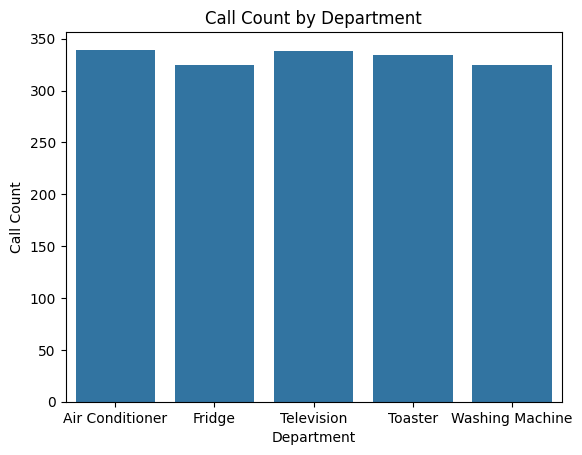

In [332]:

sns.barplot(x='Department', y='Count', data=data1,errorbar=None)
plt.xlabel('Department')
plt.ylabel('Call Count')
plt.title('Call Count by Department')
plt.show()

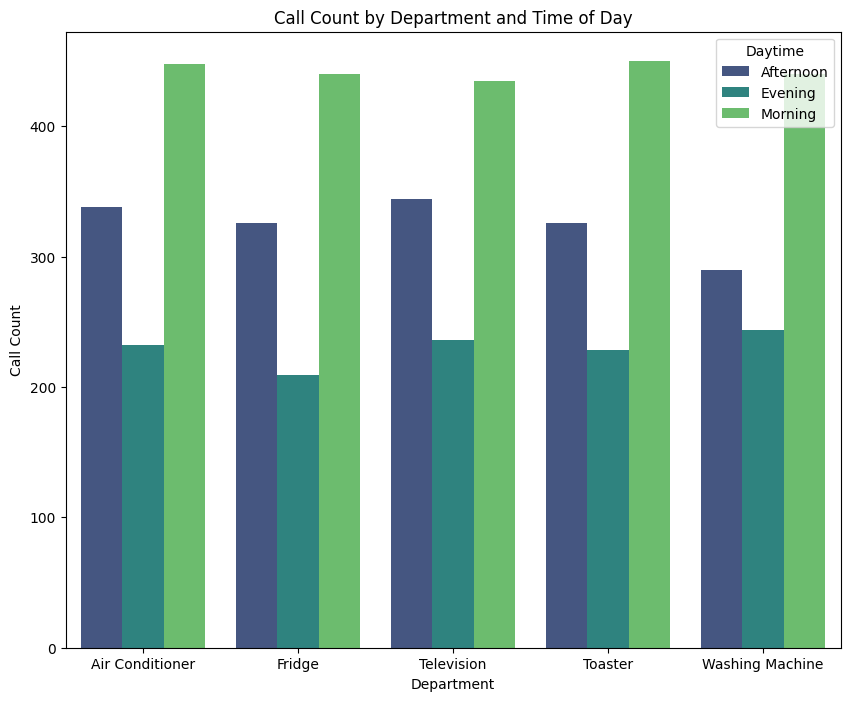

In [201]:
data1=df1.groupby(['Department','Daytime']).size().reset_index(name='Count')
plt.figure(figsize=(10, 8))
sns.barplot(x='Department', y='Count', data=data1, hue='Daytime', palette='viridis')
plt.xlabel('Department')
plt.ylabel('Call Count')
plt.title('Call Count by Department and Time of Day')
plt.show()

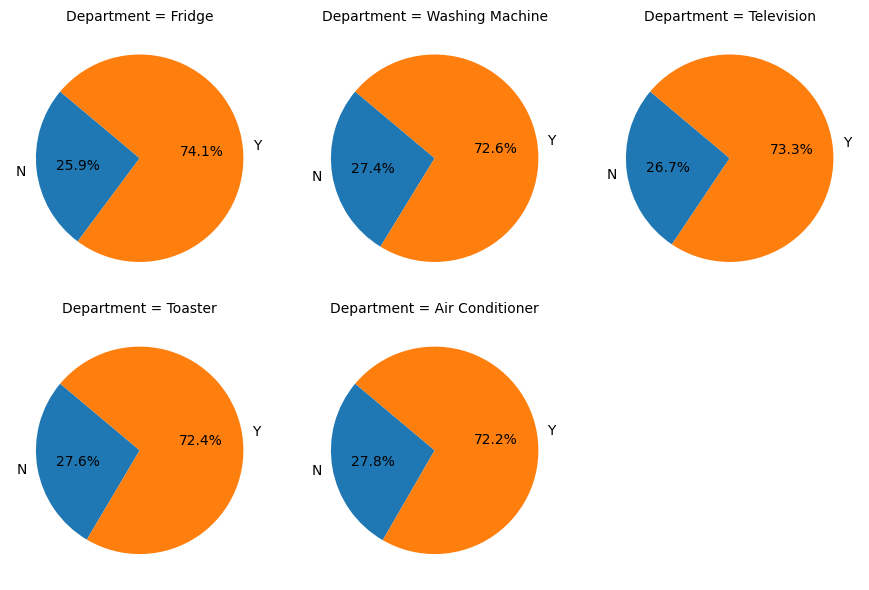

In [333]:
table = df1[['Department', 'Resolved']].value_counts().reset_index(name='Count').sort_values(by='Count', ascending=True)

# Function to create pie chart
def create_pie_chart(data, **kwargs):
	plt.pie(data['Count'], labels=data['Resolved'], autopct='%1.1f%%', startangle=140)

g = sns.FacetGrid(table, col='Department', col_wrap=3)
g.map_dataframe(create_pie_chart)
plt.show()

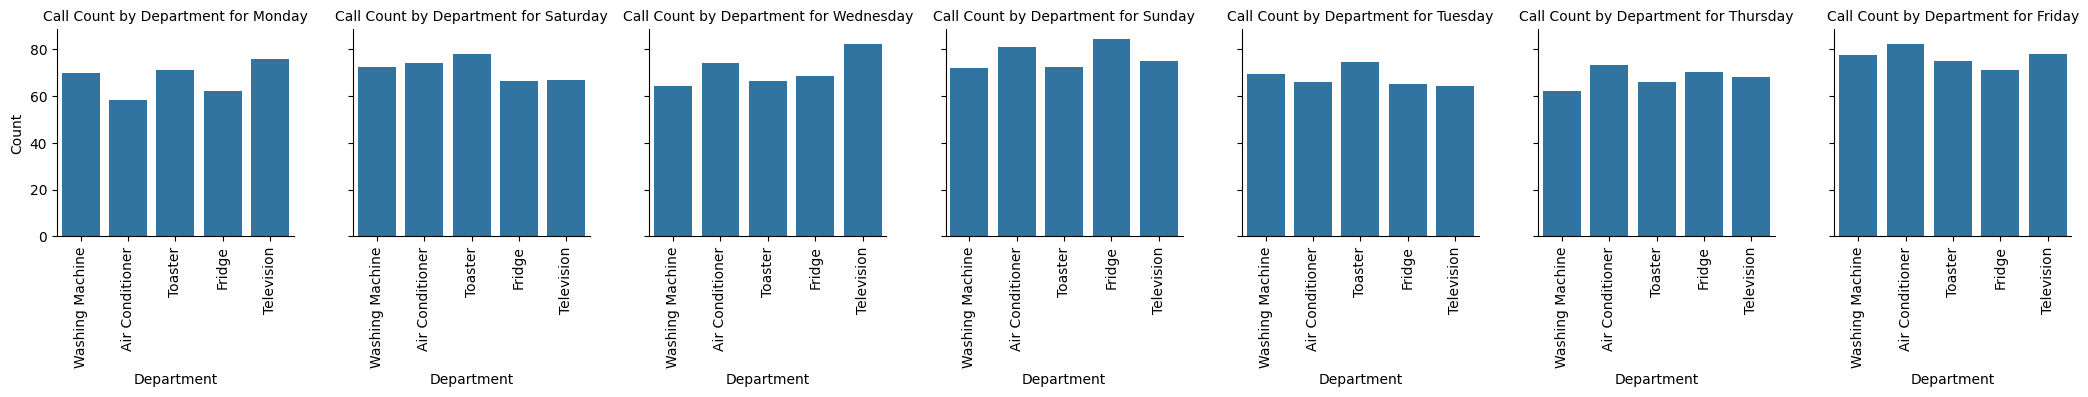

In [358]:
table=df1[['Date','Department','Resolved']].value_counts().reset_index(name='Count').sort_values(by='Count',ascending=True)
g=sns.FacetGrid(table,col='Date')
g.map(sns.barplot,'Department','Count',errorbar=None,order=df1['Department'].unique())
g.set_titles('Call Count by Department for {col_name}')
g.set_xticklabels(rotation=90)
plt.show()

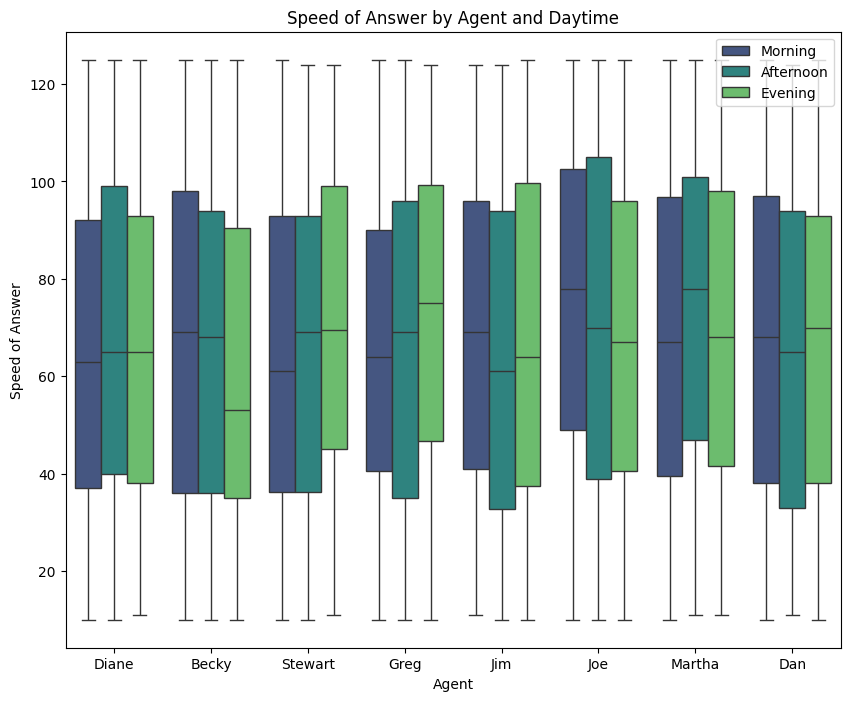

In [229]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Agent', y='Speed of Answer', data=df1,hue='Daytime', palette='viridis')
plt.legend(loc='upper right')
plt.title('Speed of Answer by Agent and Daytime')
plt.show()

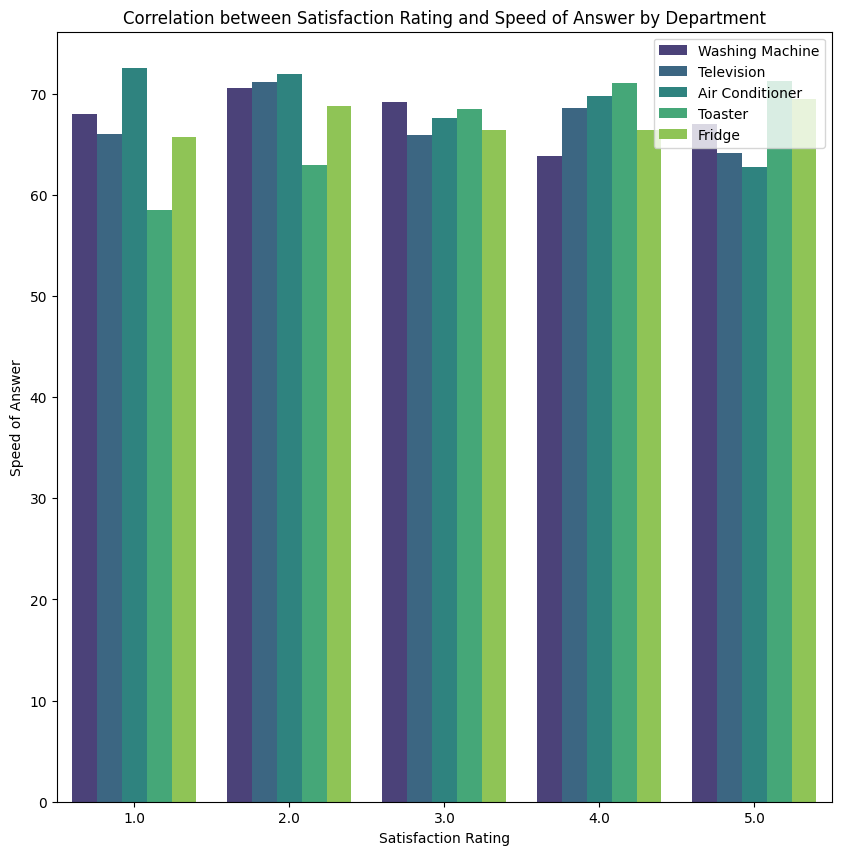

In [369]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Satisfaction rating', y='Speed of Answer', data=df1, hue='Department', palette='viridis', errorbar=None)
plt.title('Correlation between Satisfaction Rating and Speed of Answer by Department')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Speed of Answer')
plt.legend(loc='upper right')
plt.show()

In [ ]:
To import your Jupyter Notebook project to GitHub, you can follow these steps:

1. **Save your Jupyter Notebook**: Make sure your Jupyter Notebook is saved with a `.ipynb` extension.

2. **Create a GitHub Repository**:
    - Go to [GitHub](https://github.com) and log in to your account.
    - Click on the `+` icon in the top right corner and select `New repository`.
    - Fill in the repository name, description (optional), and choose whether it will be public or private.
    - Click on `Create repository`.

3. **Clone the Repository to Your Local Machine**:
    - Open a terminal or command prompt.
    - Navigate to the directory where you want to clone the repository.
    - Use the following command to clone the repository:
      ```bash
      git clone https://github.com/your-username/your-repository-name.git
      ```
    - Replace `your-username` with your GitHub username and `your-repository-name` with the name of your repository.

4. **Copy Your Jupyter Notebook to the Repository**:
    - Copy your Jupyter Notebook file (`.ipynb`) to the cloned repository directory.

5. **Commit and Push the Changes**:
    - Navigate to the cloned repository directory in your terminal or command prompt.
    - Use the following commands to add, commit, and push your changes to GitHub:
      ```bash
      git add your-notebook.ipynb
      git commit -m "Add Jupyter Notebook project"
      git push origin main
      ```
    - Replace `your-notebook.ipynb` with the name of your Jupyter Notebook file.

6. **Verify on GitHub**:
    - Go back to your GitHub repository page.
    - You should see your Jupyter Notebook file listed in the repository.

That's it! Your Jupyter Notebook project is now imported to GitHub.